Put option value: 0.5414400389684867
62


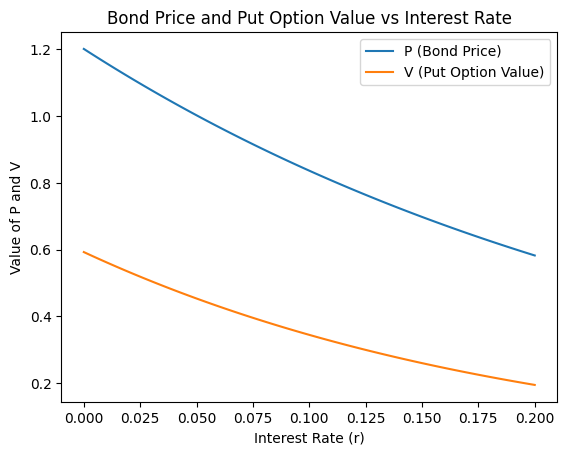

In [7]:
# Import libraries
from scipy.special import ndtr as ND
import math 
import matplotlib.pyplot as plt
import numpy as np

#Parameters

T = 8 
t = 0
r = 0.0171
Xr = 0.06
k = 0.3088
Theta = 0.068
sigma = 0.0396

#Defining all of the given functions
def mFunc(r,t,T):
    return r*math.exp(-k*(T-t)) + Theta*(1 - math.exp(-k*(T-t))) 

def qFunc(t, T):
    return sigma**2 / (4 * k**2) * (1 - math.exp(-k * (T - t)))**3

def kSquaredFunc(t,T):
    return  (sigma**2 / (2 * k**3)) * (2 * math.exp(-k * (T - t)) - 3 * math.exp(-2 * k * (T - t)) + 4 * k * (T - t) + 1)

def nFunc(r,t,T):           
    return 0.5 * r * (T - t) - ((Theta - r) / k) * (1 - math.exp(-3 * k * (T - t)))

def fFunc(r,t,T):
    return  mFunc(r,t,T) - 0.5*qFunc(t, T)

def vSquaredFunc(t,T):
    return (sigma**2 / (3 * k)) * (1 - math.exp(-3 * k * (T - t)))

def pFunc(r,t,T):    
    return math.exp(0.25*kSquaredFunc(t,T) - 0.5 * nFunc(r,t,T))

#Calculating the H(r,t,t), as it should be derived as a Z-score of the interest rate

def hFunc(r,t,T):
    return (Xr-fFunc(r,t,T)) / math.sqrt(vSquaredFunc(t,T))

#Calculating put option

def vFunc(r,t,Tx):
    return pFunc(r,t,T) *ND(hFunc(r,t,T)) 

result = vFunc(r, t,T)
print("Put option value:", result)

# Calculating bond price based on 100 values of r in the range r ∈ [0,0.2]
# Generate values for r in the range [0, 0.2] with 100 points
x = np.linspace(0, 0.2, 100)

# Initialize empty lists to store values
P_values = []
V_values = []

# Loop over each value of r in the array x
for r in x:
    P_values.append(pFunc(r, t, T))  
    V_values.append(vFunc(r, t, T))  

# Display values on graph
plt.plot(x, P_values, label="P (Bond Price)")
plt.plot(x, V_values, label="V (Put Option Value)")
plt.xlabel("Interest Rate (r)")
plt.ylabel("Value of P and V")
plt.legend()
plt.title("Bond Price and Put Option Value vs Interest Rate")